In [1]:
import numpy as np
import scipy as sp
import unittest
from SimPEG import Mesh, Maps, Models, Utils
import inspect
import matplotlib.pyplot as plt
from SimPEG.Utils import mkvc
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



[2 4 1 5 -1 7]


(<matplotlib.cm.ScalarMappable at 0x260ec699be0>,)

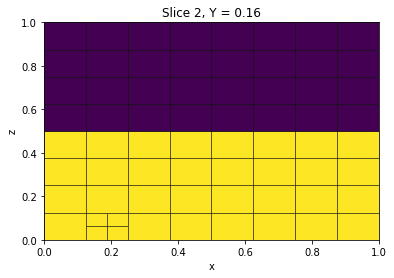

In [99]:
mesh_L = Mesh.TreeMesh([16, 16, 16])
mesh_L.refine(3, finalize=False)
mesh_L.insert_cells(np.c_[0.2,0.2,0.1], 4, finalize=True)

mesh_G = Mesh.TreeMesh([16, 16, 16])
mesh_G.refine(3, finalize=True)

actv_b = np.ones(mesh_G.nC, dtype='bool')
actv_b[mesh_G.gridCC[:,2]>0.5] = False

actvIndGlobal = np.where(actv_b)[0].tolist()

indL = mesh_L._get_containing_cell_indexes(mesh_G.gridCC)

full = np.c_[indL, np.arange(mesh_G.nC)]
# Create new index based on unique active
# [ua, ind] = np.unique(indL, return_index=True)

check = np.where(mesh_L.vol[indL] < mesh_G.vol)[0].tolist()

# Reverse inside global to local
indG = mesh_G._get_containing_cell_indexes(mesh_L.gridCC)

model = np.zeros(mesh_L.nC)

# model[ua] = 1
# ind = 1
# model[ind] = 1

print(mesh_L[ind].neighbors)
# append index
rows = []
for ind in check:

    if ind in actvInd:
        indAdd = np.where(ind == indG)[0]
        rows += [np.c_[indAdd, np.ones_like(indAdd)*ind]]
        model[indAdd] = 0.5
    
# indL = indL[actv]
full = np.r_[full[actvIndGlobal,:], np.vstack(rows)]

model[full[:,0]]=0.5

actvIndLocal = np.unique(full[:,0])

full = np.c_[np.searchsorted(actvIndLocal, full[:, 0]), np.searchsorted(actvIndGlobal, full[:, 1])]
mesh_L.plotSlice(model, ind=2, normal='Y', grid=True)

In [100]:
full



array([[  0,   0],
       [  1,   1],
       [  2,   2],
       [  3,   3],
       [ 11,   4],
       [ 12,   5],
       [ 13,   6],
       [ 14,   7],
       [ 15,   8],
       [ 16,   9],
       [ 17,  10],
       [ 18,  11],
       [ 19,  12],
       [ 20,  13],
       [ 21,  14],
       [ 22,  15],
       [ 23,  16],
       [ 24,  17],
       [ 25,  18],
       [ 26,  19],
       [ 27,  20],
       [ 28,  21],
       [ 29,  22],
       [ 30,  23],
       [ 31,  24],
       [ 32,  25],
       [ 33,  26],
       [ 34,  27],
       [ 35,  28],
       [ 36,  29],
       [ 37,  30],
       [ 38,  31],
       [ 39,  32],
       [ 40,  33],
       [ 41,  34],
       [ 42,  35],
       [ 43,  36],
       [ 44,  37],
       [ 45,  38],
       [ 46,  39],
       [ 47,  40],
       [ 48,  41],
       [ 49,  42],
       [ 50,  43],
       [ 51,  44],
       [ 52,  45],
       [ 53,  46],
       [ 54,  47],
       [ 55,  48],
       [ 56,  49],
       [ 57,  50],
       [ 58,  51],
       [ 59,

In [2]:
a = np.array(np.ones(8))
b = np.array(np.ones(8))

mesh_a = Mesh.TreeMesh([16, 16], x0=np.array([3, 5]))
mesh_a.refine(2, finalize=True)

# Create sub meshes offseted
mesh_b = Mesh.TreeMesh([8,8])
mesh_b.x0 = mesh_a.x0-0.1


mesh_b.refine(1, finalize=True)



actv_a = np.ones(mesh_a.nC, dtype='bool')
actv_b = np.ones(mesh_b.nC, dtype='bool')

# Create model
m = np.zeros(mesh_a.nC)
m[8:10] = 2

M = Maps.Tile((mesh_a, actv_a), (mesh_b, actv_b))
mout = M*m
mDeriv = M.deriv(m).T*(mout)


In [3]:
check


NameError: name 'check' is not defined

In [4]:
# Check where the cells in local are smaller than global
check = np.where(mesh_a.vol[ua] < mesh_b.vol[actv_b])[0].tolist()





# ind = mesh_b._get_containing_cell_indexes(mesh_a.gridCC[ind])

# print(ind)

for ii in check:
    ind = mesh_a[ii].neighbors
    print(ind[ind!=-1])
    
    








NameError: name 'ua' is not defined

In [5]:
check


NameError: name 'check' is not defined

In [6]:
indL = mesh_a._get_containing_cell_indexes(mesh_b.gridCC[actv_b])

# indG = mesh_b._get_containing_cell_indexes(mesh_a.gridCC)
#

# Create new index based on unique active
[ua, ind] = np.unique(indL, return_index=True)
newCellInd = np.arange(ua.shape[0])

activeLocal = np.zeros(mesh_a.nC, dtype='bool')
activeLocal[ua] = True

# activeLocal = activeLocal

# Transfer old index to new
indL = np.searchsorted(ua, indL)

full = np.c_[indL, np.arange(actv_b.sum())]



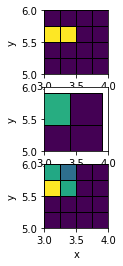

In [7]:
axs = plt.subplot(3,1,1)
mesh_a.plotImage(m, grid='on', ax=axs, clim=[0,2])
axs.set_xlim([3,4])
axs.set_ylim([5,6])
axs.set_aspect('equal')


axs = plt.subplot(3,1,2)
mesh_b.plotImage(mout, grid='on', ax=axs, clim=[0,2])
axs.set_xlim([3,4])
axs.set_ylim([5,6])
axs.set_aspect('equal')

axs = plt.subplot(3,1,3)
mesh_a.plotImage(mDeriv, grid='on', ax=axs)


axs.set_xlim([3,4])
axs.set_ylim([5,6])

axs.set_aspect('equal')

plt.show()

In [10]:
mesh = Mesh.TensorMesh([5,6,7], 'CC0')



In [11]:
mesh.h



[array([0.2, 0.2, 0.2, 0.2, 0.2]),
 array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]),
 array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714])]

In [6]:
tol = 1e-7

# Check that max and min model values are preserved
np.linalg.norm(mout[mout>0].min()-m.min()) < tol
np.linalg.norm(mout[mout>0].max()-m.max()) < tol

False

In [7]:
meshGlobal = Mesh.TensorMesh([np.ones(10),np.ones(10),np.ones(10)], x0='CCC')
meshLocal = Mesh.TensorMesh([np.ones(3)*3,np.ones(3)*3,np.ones(3)*3], x0='CCC')
actvGlobal = np.ones(meshGlobal.nC, dtype='bool')
actvLocal = np.ones(meshLocal.nC, dtype='bool')

M = Maps.Tile((meshGlobal, actvGlobal), (meshLocal, actvLocal))
M.nCell=100

m = np.zeros(meshGlobal.nC)
m[10*10*5 + 5*11] = 1
mout = M.Paverage*m

# meshGlobal.writeModelUBC('InterpModel.dat',m)
# meshGlobal.writeUBC('MeshGlobal.msh')

# meshLocal.writeModelUBC('InterpModelLocal.dat',mout)
# meshLocal.writeUBC('MeshLocal.msh')

m = np.ones(meshLocal.nC)
mout2 = M.Pvolume.T*m

# meshGlobal.writeModelUBC('InterpModel.dat',mout2)
# meshGlobal.writeUBC('MeshGlobal.msh')

# meshLocal.writeModelUBC('InterpModelLocal.dat',m)
# meshLocal.writeUBC('MeshLocal.msh')

AttributeError: 'Tile' object has no attribute 'Paverage'

In [ ]:
M.Pvolume.T.sum()
1/27

In [ ]:
meshGlobal.plotGrid()
plt.show()

meshLocal.plotGrid()
plt.show()


In [ ]:
M.writeUBC('OctreeTest.msh')

In [ ]:
np.savetxt('OctreeBswCorn.dat',bsw,fmt='%f')
np.savetxt('OctreeTneCorn.dat',tne,fmt='%f')
np.savetxt('OctreeCenter.dat',M.gridCC,fmt='%f')
np.savetxt('OctreeNodes.dat',M.gridN,fmt='%f')


In [ ]:
# Create a global octree
mesh = Mesh.TreeMesh([16,16,16])

# Create an array of points 
X, Y = np.meshgrid(np.arange(.25,1.,0.1), np.arange(.25,1.,0.1))
Z = np.ones_like(X) *0.5

Utils.modelutils.refineTree(mesh, np.c_[mkvc(X),mkvc(Y),mkvc(Z)], dtype='point', nCpad=[1,0,0])
mesh.finalize()

In [ ]:
model = np.zeros(mesh.nC)
ind = Utils.ModelBuilder.getIndicesBlock(np.r_[.35,.35,.35], np.r_[.55,.55,.55], mesh.gridCC)
model[ind] = 1

ind = Utils.ModelBuilder.getIndicesBlock(np.r_[.55,.55,.35], np.r_[.75,.75,.55], mesh.gridCC)
model[ind] = 0.5

actv = np.ones(mesh.nC, dtype='bool')
actv[mesh.gridCC[:,2]>0.5] = False

model[actv==False] = np.nan
def f(ind):
    mesh.plotSlice(model, ind=ind, normal='Z')
    

interactive_plot = interactive(f, ind=(0, 10))

interactive_plot


In [ ]:
mesh2 = Mesh.TreeMesh([16,16,16])
X, Y = np.meshgrid(np.arange(.25,.5,0.1), np.arange(.25,1.,0.1))
Z = np.ones_like(X) *0.5

Utils.modelutils.refineTree(mesh2, np.c_[mkvc(X),mkvc(Y),mkvc(Z)], dtype='point', nCpad=[1,0,0], finalize=True)
actv2 = np.ones(mesh2.nC, dtype='bool')

actv2[mesh2.gridCC[:,2]>0.5] = False
tileMap = Maps.Tile((mesh, actv), (mesh2, actv2))

activeCellsMap = Maps.InjectActiveCells(mesh2, actv2, np.nan)

m2 = activeCellsMap*tileMap*model[actv]



In [ ]:
m2.shape


In [ ]:
def f(ind):
    mesh2.plotSlice(m2, ind=ind, clim=[0,1.], normal='Z'
                   )
    

interactive_plot = interactive(f, ind=(0, 15))

interactive_plot

In [ ]:
m2.min(), m2.max()


